In [34]:
# Cargando las bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from util import plot_decision_regions, plot_decision_regions_without_ds,plot_svc_decision_function
import matplotlib.pyplot as plt

In [2]:
# Cargando los datasets
ds = datasets.load_iris()
X, y = ds.data[:, :2], ds.target

In [3]:
# Clasificador Linear
clf = svm.SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
# Haciendo pruebas
indexes = np.random.randint(len(X),size=10)
X_test = X[indexes]
y_test = y[indexes]
print("Expected")
print(y_test)
res = clf.predict(X_test)
print("Obtained")
print(res)
# Calcula el score mean accuracy
clf.score(X_test,y_test)

Expected
[1 1 2 2 2 0 1 0 2 1]
Obtained
[2 1 2 1 1 0 1 0 2 1]


0.69999999999999996

## Visualizando las regiones

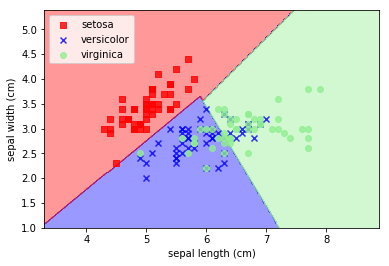

In [6]:
plot_decision_regions(X, y, classifier=clf,ds=ds)
plt.xlabel(ds.feature_names[0])
plt.ylabel(ds.feature_names[1])
plt.legend(loc='upper left')
plt.show()

## Lidiando con C

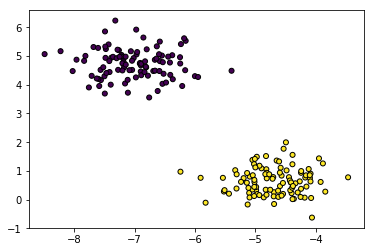

In [15]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=0.5, random_state=12)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()

c:\users\gonta\appdata\local\programs\python\python35-32\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


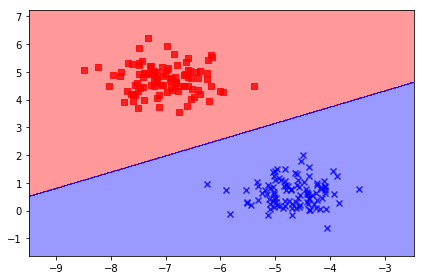

In [16]:
clf = svm.SVC(kernel='linear', random_state=0)
clf.fit(X, y)

plot_decision_regions_without_ds(X, y, classifier=clf)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

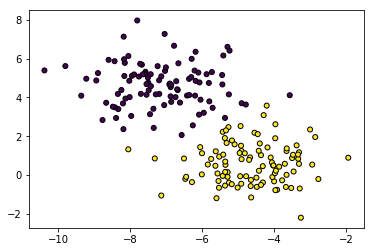

In [40]:
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.1, random_state=12)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()

c:\users\gonta\appdata\local\programs\python\python35-32\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


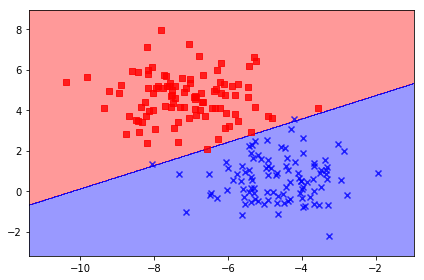

In [47]:
clf = svm.SVC(kernel='linear', C=C, random_state=12)
clf.fit(X,y)

#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
#plot_svc_decision_function(clf, plot_support=False);
#plt.show()

plot_decision_regions_without_ds(X, y, classifier=clf)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

c:\users\gonta\appdata\local\programs\python\python35-32\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


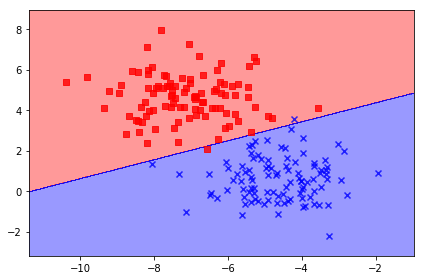

In [50]:
clf = svm.SVC(kernel='linear', C=1000, random_state=12).fit(X, y)
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
#plot_svc_decision_function(clf, plot_support=False);
#plt.show()

#plot
plot_decision_regions_without_ds(X, y, classifier=clf)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

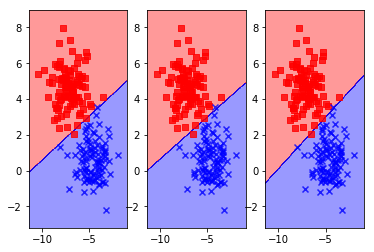

In [51]:
for idx, C in enumerate([0.1, 1.0, 100]):
    # Entrenamiento
    clf = svm.SVC(kernel='linear', C=C, random_state=12)
    clf.fit(X, y)
    # Plot
    plt.subplot(1, 3, idx + 1)

    plt.axis("tight")
    plot_decision_regions_without_ds(X, y, classifier=clf)
    plt.axis("tight")
plt.show()

c:\users\gonta\appdata\local\programs\python\python35-32\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


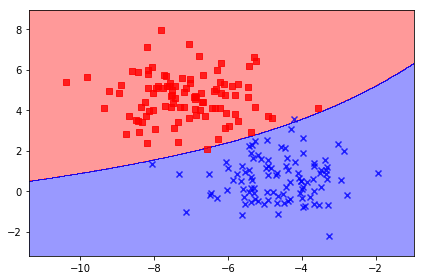

In [52]:
clf = svm.SVC(kernel='poly', degree=2, random_state=12).fit(X, y)
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
#plot_svc_decision_function(clf, plot_support=False);
#plt.show()

#plot
plot_decision_regions_without_ds(X, y, classifier=clf)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Lidiando con la no linearidad

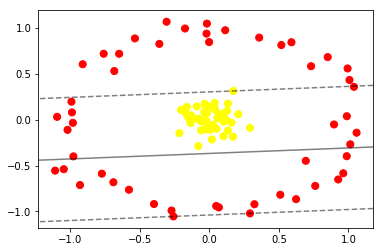

In [57]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
#Linear SVM
clf = svm.SVC(kernel='linear', C=10000).fit(X, y)
#plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);
plt.show()

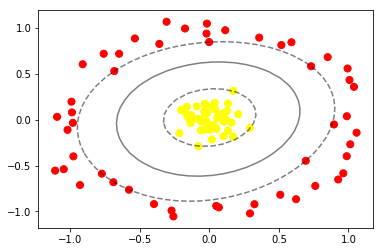

In [60]:
clf = svm.SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.show()

## Comparando algunos kernels

In [61]:
# Creando datasets ficticios
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
y = [0] * 8 + [1] * 8

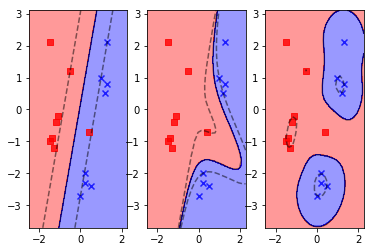

In [63]:
for idx, k in enumerate(['linear', 'poly', 'rbf']):
    # Entrenamiento
    clf = svm.SVC(kernel=k, gamma=2, random_state=12)
    clf.fit(X, y)
    # Plot
    plt.subplot(1, 3, idx + 1)

    plt.axis("tight")
    plot_decision_regions_without_ds(X, y, classifier=clf)
    plot_svc_decision_function(clf, plot_support=False);
    plt.axis("tight")
plt.show()